# Problem Description
You are a scientist and have been asked by company Gem Stones LLC to help increase profit for their cubic zirconia manufacturing. Gem Stones LLC provides you with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia. This type of stone is an inexpensive diamond alternative with many of the same qualities as a diamond, and also has strikingly similar appearance. The company is earning different profits on the different types of zirconia based on unique stone features. Your task is to help the company in predicting the price for the stone based on the details given in the dataset so that Gem Stones LLC can produce more of the highly profitable stones and possibly lower the production of lower profitable stones and in effect, increase their profit share. Additionally, Gem Stones LLC would like the 5 attributes that are most important to a cubic zirconia's value.

The type of algorithm is regression and this is a supervised learning task to predict prices for stones based on distinct feature sets in order to help increase profits for Gem Stones.

The data set is sourced from kaggle. The data itself and additional info can be found at the cubic zirconia dataset located here https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction/data?select=cubic_zirconia.csv. The data is in tabular form with the movies metadata set having 193573 rows and 10 columns. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [28]:
df = pd.read_csv('train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [30]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [31]:
# Explore if any null values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [32]:
df.drop(['id'],axis=1,inplace=True)

In [33]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

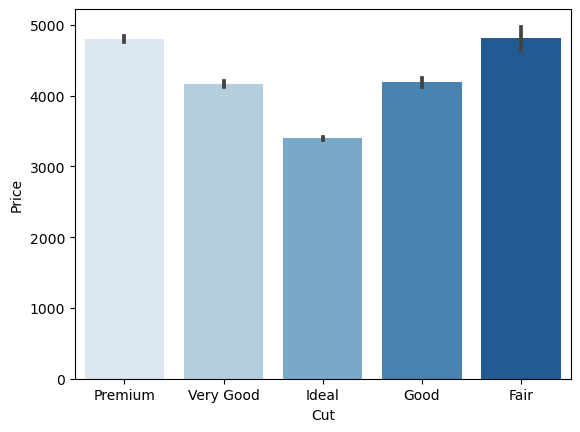

In [34]:
sns.barplot(data=df, x='cut', y='price', palette='Blues')
plt.xlabel('Cut')
plt.ylabel('Price')

From the plot above, we can see that the Premium and Fair cuts of stone have the highest price.

/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

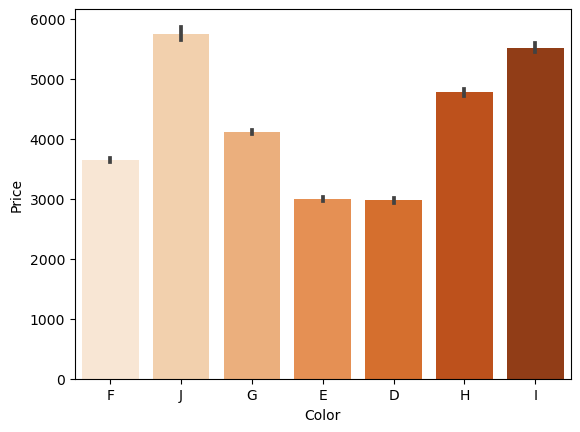

In [35]:
sns.barplot(data=df, x='color', y='price', palette='Oranges')
plt.xlabel('Color')
plt.ylabel('Price')

We see that the Color J has the highest price, followed by color I.

/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

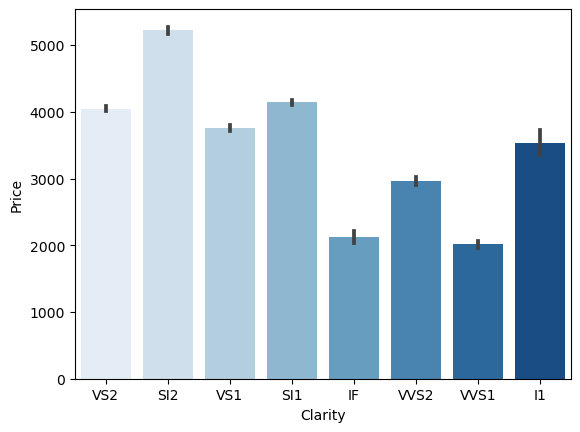

In [36]:
sns.barplot(data=df, x='clarity', y='price', palette='Blues')
plt.xlabel('Clarity')
plt.ylabel('Price')

We see that SI2 has the highest price, followed by SI1. 

/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

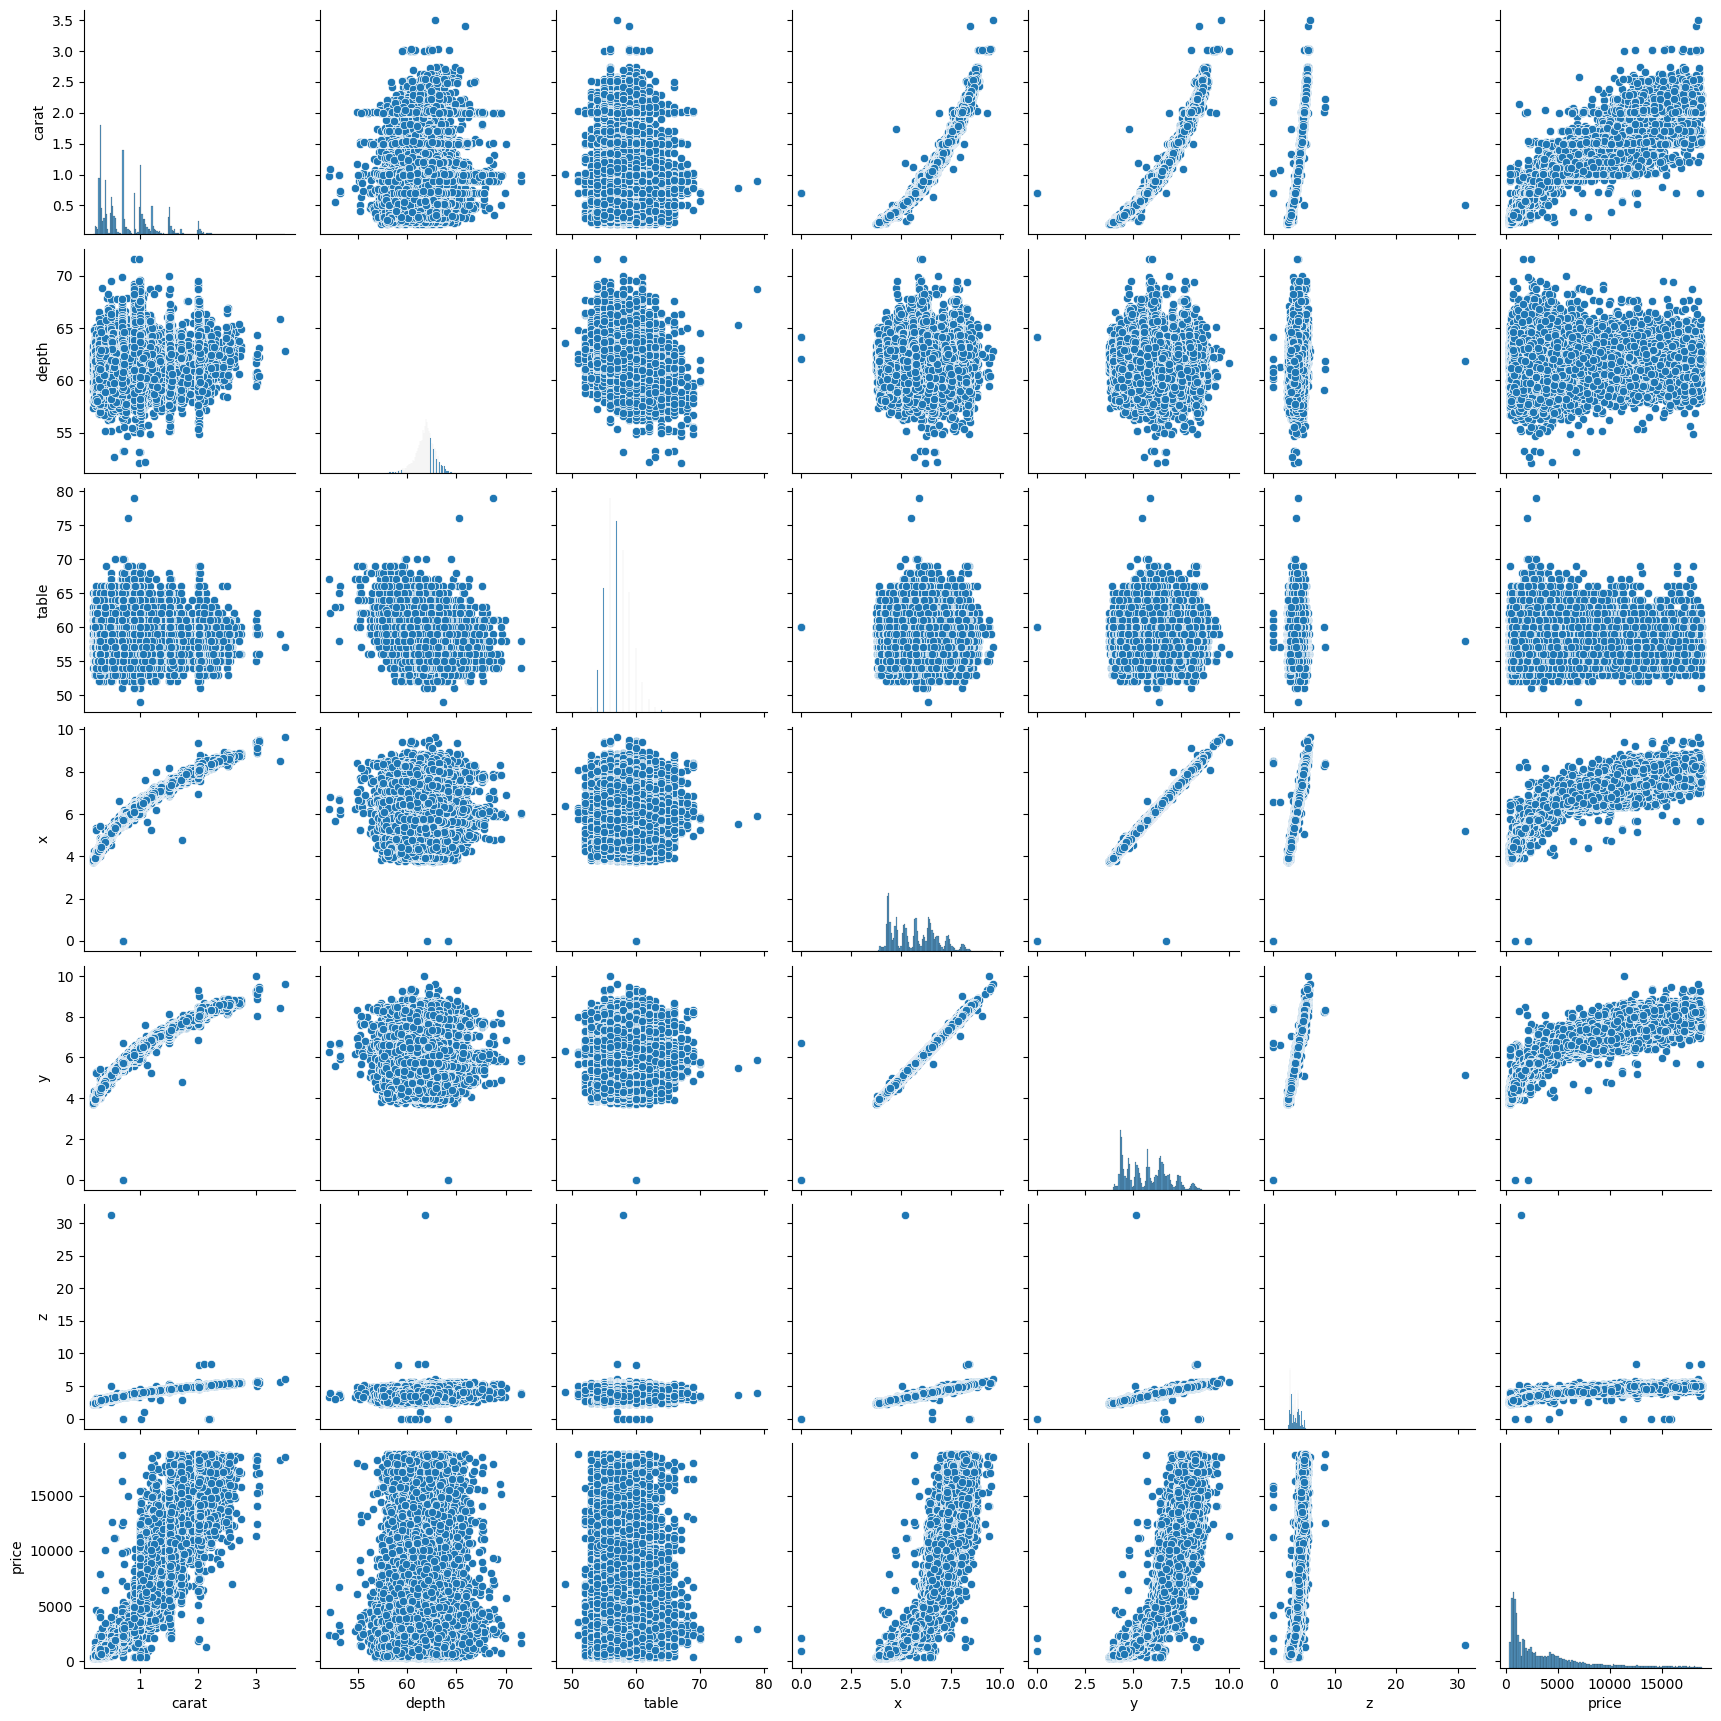

In [37]:
sns.pairplot(df)

In [38]:
in_cols = df.columns[:-1]
targ = "price"
targ_df = df[targ]
in_df = df[in_cols].copy()
in_df

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [39]:
numeric = in_df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric

['carat', 'depth', 'table', 'x', 'y', 'z']

In [40]:
categorical = in_df.select_dtypes(include=['object']).columns.tolist()
categorical

['cut', 'color', 'clarity']

## Preprocessing & Scaling

In [41]:
in_df[numeric].describe().loc[['min','max']]

,carat,depth,table,x,y,z
min,0.2,52.1,49.0,0.00,0.00,0.0
max,3.5,71.6,79.0,9.65,10.01,31.3


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numeric])

In [43]:
in_df[numeric] = scaler.transform(in_df[numeric])
in_df.describe().loc[['min','max']]

,carat,depth,table,x,y,z
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


## Encoding cut, color, clarity

In [44]:
in_df.shape

(193573, 9)

In [45]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(in_df[categorical])

In [46]:
onehot_cols = list(onehot.get_feature_names_out(categorical))
onehot_cols

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [47]:
in_df[categorical]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [48]:
in_df[onehot_cols] = onehot.transform(in_df[categorical])
in_df

,carat,cut,color,clarity,depth,table,x,y,z,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.400000,Premium,F,VS2,0.517949,0.300000,0.753368,0.732268,0.145367,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.554545,Very Good,J,SI2,0.507692,0.300000,0.835233,0.811189,0.161342,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.151515,Ideal,G,VS1,0.466667,0.266667,0.589637,0.572428,0.111821,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.036364,Ideal,G,VS1,0.487179,0.233333,0.453886,0.440559,0.086581,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.454545,Premium,G,VS2,0.538462,0.333333,0.792746,0.760240,0.152396,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193568,0.033333,Ideal,D,VVS2,0.461538,0.233333,0.450777,0.438561,0.085304,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
193569,0.151515,Premium,G,VVS2,0.420513,0.300000,0.595855,0.576424,0.110863,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
193570,0.160606,Very Good,F,SI1,0.564103,0.266667,0.592746,0.574426,0.115655,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
193571,0.042424,Very Good,D,SI1,0.553846,0.200000,0.461140,0.448551,0.089776,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Correlation Matrix

<Axes: >

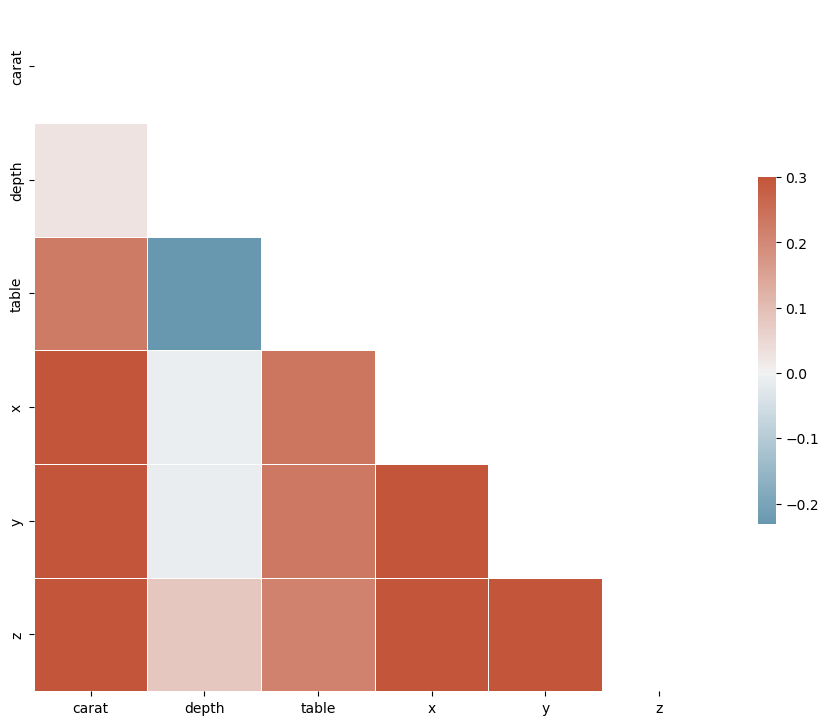

In [49]:
corr = in_df[numeric].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, we can see that the carat feature strongly correlates to x, y, z dimensions based on the deep shade of red/orange. This makes sense because x,y,z features describe the volume of the cubic zirconia and the larger these amounts, the bigger the volume -- and generally the larger the volume of a stone, the heavier the weight and thus the carat amount.

# Analysis (Model Building and Training)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(in_df[numeric + onehot_cols], targ_df, test_size=0.25, random_state=42)
x_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32902,0.245455,0.512821,0.233333,0.662176,0.640360,0.127157,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57798,0.266667,0.543590,0.200000,0.676684,0.658342,0.130671,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
126937,0.551515,0.394872,0.366667,0.849741,0.827173,0.157188,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78503,0.036364,0.558974,0.233333,0.448705,0.435564,0.087540,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22179,0.163636,0.579487,0.500000,0.596891,0.570430,0.115974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.090909,0.415385,0.400000,0.529534,0.514486,0.098722,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103694,0.518182,0.523077,0.433333,0.813472,0.778222,0.155591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
131932,0.309091,0.548718,0.300000,0.706736,0.673327,0.136102,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146867,0.033333,0.461538,0.233333,0.452850,0.439560,0.085304,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
y_train

32902      4078
57798      5851
126937    16383
78503       477
22179      2401
          ...  
119879     1410
103694    15064
131932     7209
146867      816
121958      408
Name: price, Length: 145179, dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression().fit(x_train, y_train)

In [55]:
print(model.coef_, model.intercept_)

[ 4.74758556e+04 -2.42551886e+03 -1.14406311e+03 -1.48596142e+04
 -6.18589168e+03 -4.30302452e+03 -4.06909923e+02  4.60611958e+00
  1.76687233e+02  1.20470160e+02  1.05146410e+02  7.68357429e+02
  5.97743642e+02  5.20537803e+02  4.08968501e+02 -9.60590956e+01
 -6.52497337e+02 -1.54705094e+03 -2.72439829e+03  1.10604919e+03
 -1.92522182e+02 -1.11247851e+03  6.78888845e+02  3.98204005e+02
  9.12696806e+02  9.33560129e+02] 9294.624609246814


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
train_pred = model.predict(x_train)

In [58]:
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
print(train_rmse)

949.1324090817841


In [59]:
# Validation/test set predictions
test_pred = model.predict(x_test)
test_pred

array([ 1466.94897   , 15215.87890682,  1137.20551124, ...,
         339.24674544,  2391.72432378,   -36.64739386])

In [60]:
test_rmse = mean_squared_error(y_test, test_pred, squared=False)
print(test_rmse)

953.7115315569941


# Predicting Price on Test data

In [61]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [62]:
weights=model.coef_

weights_df=pd.DataFrame({
    'columns':x_train.columns,
    'weight':weights,

}).sort_values('weight',ascending=False)

weights_df.head()

,columns,weight
0,carat,47475.855617
19,clarity_IF,1106.049192
25,clarity_VVS2,933.560129
24,clarity_VVS1,912.696806
11,color_D,768.357429


In [63]:
test_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [64]:
test_df.duplicated().sum()

0

In [65]:
test_df[numeric], test_df[categorical]

(        carat  depth  table     x     y     z
 0        0.35   62.3   56.0  4.51  4.54  2.82
 1        0.77   62.8   56.0  5.83  5.87  3.68
 2        0.71   61.9   53.0  5.77  5.74  3.55
 3        0.33   61.6   55.0  4.44  4.42  2.73
 4        1.20   62.7   56.0  6.75  6.79  4.24
 ...       ...    ...    ...   ...   ...   ...
 129045   0.72   62.0   56.0  5.75  5.78  3.57
 129046   0.70   59.6   62.0  5.77  5.74  3.43
 129047   1.01   62.3   58.0  6.44  6.41  4.01
 129048   1.35   62.0   56.0  7.05  7.08  4.38
 129049   1.07   62.6   60.0  6.49  6.45  4.06
 
 [129050 rows x 6 columns],
               cut color clarity
 0           Ideal     D     VS2
 1       Very Good     F     SI2
 2           Ideal     I     VS2
 3           Ideal     G    VVS2
 4       Very Good     I     VS2
 ...           ...   ...     ...
 129045      Ideal     D    VVS2
 129046    Premium     D     SI1
 129047    Premium     G    VVS2
 129048      Ideal     D      I1
 129049    Premium     H     SI2
 
 [129050

### Feature engineering for numeric and categorical features

In [66]:
test_df[numeric] = scaler.transform(test_df[numeric])

In [67]:
test_df[onehot_cols] = onehot.transform(test_df[categorical])

In [68]:
test_in = test_df[numeric + onehot_cols]
test_df.shape

(129050, 30)

In [69]:
test_pred = model.predict(test_in)
test_pred

array([1122.15952027, 2299.56319848, 2262.50698097, ..., 6369.68350309,
       6728.14990166, 4459.64258813])

# Result

In [70]:
results_df = pd.read_csv('sample_submission.csv')
results_df.head()

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155


In [71]:
results_df[targ] = test_pred
results_df

,id,price
0,193573,1122.159520
1,193574,2299.563198
2,193575,2262.506981
3,193576,1329.919008
4,193577,6773.708583
...,...,...
129045,322618,4239.067973
129046,322619,2851.917382
129047,322620,6369.683503
129048,322621,6728.149902


In [82]:
res_carat = pd.concat([results_df, test_df['carat']], axis=1)
res_carat

,id,price,carat
0,193573,1122.159520,0.045455
1,193574,2299.563198,0.172727
2,193575,2262.506981,0.154545
3,193576,1329.919008,0.039394
4,193577,6773.708583,0.303030
...,...,...,...
129045,322618,4239.067973,0.157576
129046,322619,2851.917382,0.151515
129047,322620,6369.683503,0.245455
129048,322621,6728.149902,0.348485


/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henry/movie-recommender-system-svd/.conda/lib/python3.10/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


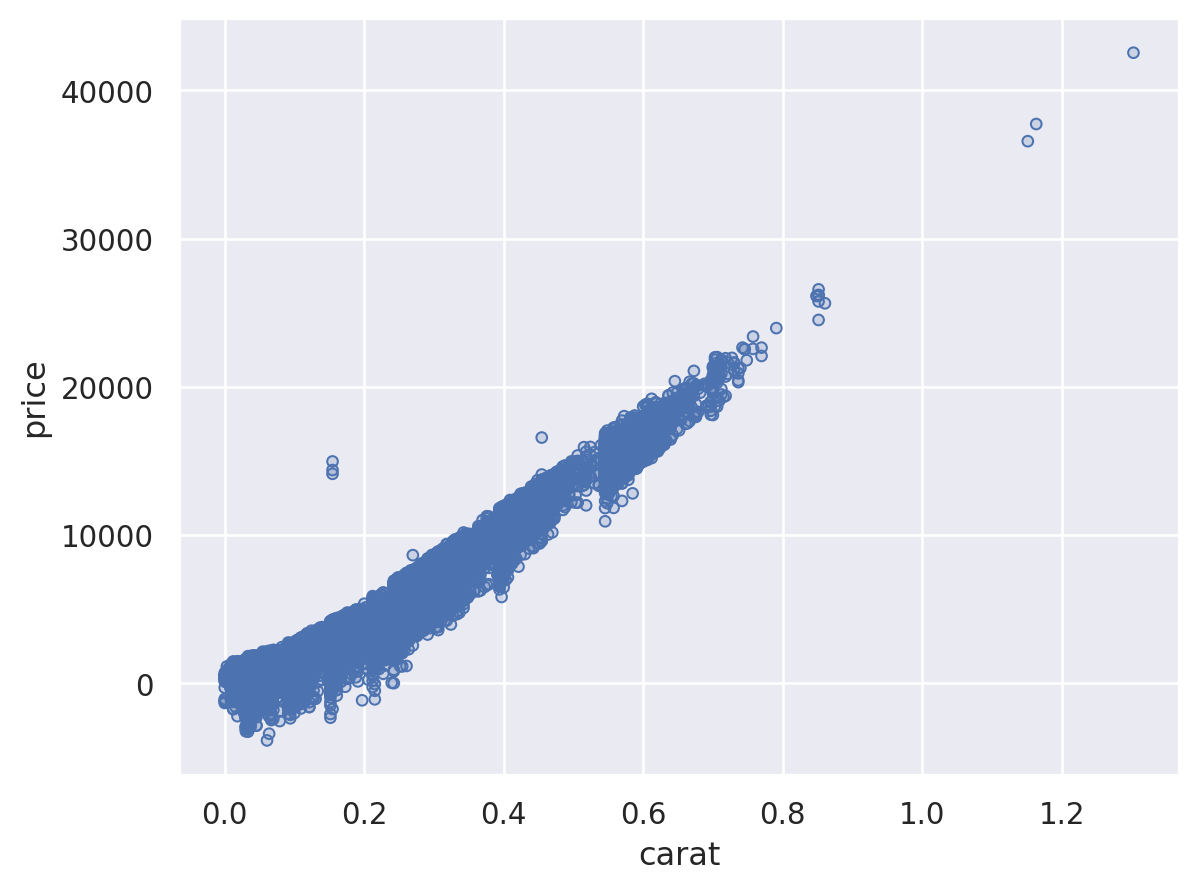

In [87]:
import seaborn.objects as so

p1 = so.Plot(res_carat, 'carat', 'price')
p1.add(so.Dots())

Here we see the predicted prices for Gem Stone's stone inventory using a linear regression model, which is one type of supervised learning model. I have created a dot plot graph with all of the estimated prices using my built regression model. As we can see in this plotted graph above, the price of a cubic zirconia stone is heavily linked to the size of the stone as one might expect. In other words, there is a strong positive correlation between carat size and price.  

I think that further ways to improve this model performance could be using more advanced regression techniques and possibly more hyperparamater tuning. The downside of additional tuning is the amount of time it takes to run the notebook and optimize models, which adds to the total run time of training a model.

# Conclusion

The five attributes that are most important to a cubic zirconia's value are as follows, with importance defined by weight in descending order.

In [153]:
weights_df.head()

,columns,weight
0,carat,47475.855617
19,clarity_IF,1106.049192
25,clarity_VVS2,933.560129
24,clarity_VVS1,912.696806
11,color_D,768.357429


After exploring the data to perform analysis on all the features provided, I graphed the features to take a deeper look at each one's impact on our target value of price. I performed feature engineering by scaling the numerical values and by one-hot encoding the categorical values. This was important because features like cut and color, for example a cut of "premium" and color of "F" in string form does not provide meaningful information when used as is in a regression model. After transforming values and building a model, I ran validation on the model predictions using 25% of the remaining dataset. Finally, we found the five attributes that are most important to a cubic zirconia stone's value -- we see the number one attribute being carat, followed by clarity. Finally, I predicted the stone prices using the built linear regression model on the requested test dataset and formed a final pandas dataframe with the model results.

Possible ways to improve this could be adding different types of stone, most notably diamond and we can see if there are any interesting patterns from the price curves. An initial guess would be that diamond prices might have a more exponential curve to the price increases based on carat size, compared to cubic zirconia. Zirconia is orders of magnitude cheaper for the same size of carat and it is likely that as the carat size grows, as seen in real life, diamond prices dramatically increase.